In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

<class 'numpy.ndarray'>
(460, 300)


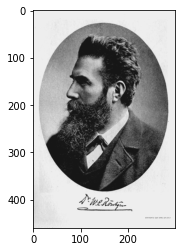

In [25]:
# Reading image (grayscale)
img = cv2.imread('//content/drive/MyDrive/Coding Assignments IVP/roentgen_low_contrast.jpeg', 0)    
# img is a 3-dimensional numpy array (third number indicates channel)
print(type(img)) 
print(img.shape) 
plt.imshow(img, cmap ='gray') 

# Implementing Same - Padding Convolution
Image size: n x n <br>
Kernel size: f x f <br>
Same padding size: (f-1)/2 <br>
In same padding technique the input image is padded with zeros in such a way that the output size remains the same as the input size. <br>

In [23]:
def Conv2(img,kernel):
  # Extracting image and filter dimentions 
  img_h ,img_w = img.shape
  kernel_h, kernel_w = kernel.shape

  # Defining padding size
  pad_h = int((kernel_h-1)/2)
  pad_w = int((kernel_w-1)/2)

  # Zero padding to the image
  # Added zeros to each edge side of the image should be the same amount of padding dimentions 
  padded_img = np.pad(img,((pad_h, pad_h), (pad_w, pad_w)), 'constant')

  # Creating output buffer
  output = np.zeros((img_h, img_w))

  # Performing convolution with given kernel
  for i in range(img_h):
    for j in range(img_w):

      # Selecting patch - extracting desired indexes in each loop
      patch = padded_img[i:i + kernel_h, j:j + kernel_w]

      # Convolving patch and kernel
      output[i,j] = np.sum(patch * kernel)

  return output

In [24]:
def plot_filtering(img,filter):

  # Applying Conv2 function 
  output = Conv2(img, filter)

  # Ploting - Image and Filtered output
  plt.figure(figsize = (15,15))
  plt.subplot(1,2,1)
  im1 = plt.imshow(img, cmap ='gray')
  plt.title('Original Image')
  plt.colorbar(im1, fraction=0.046, pad=0.04)
  plt.subplot(1,2,2)
  im2 = plt.imshow(output, cmap='gray')
  plt.title('Filtered Image')
  plt.colorbar(im2, fraction=0.046, pad=0.04)

  # Calculate the Fourier Transform of the image, filter, output
  f_img = np.fft.fft2(img)
  f_filter = np.fft.fft2(filter, s = img.shape)
  f_output = np.fft.fft2(output)

  # Shift the zero-frequency component to the center of the spectrum
  # Compute the magnitude spectrum
  mImg_spectrum = 20 * np.log(np.abs(np.fft.fftshift(f_img)))
  mFilter_spectrum = 20 * np.log(np.abs(np.fft.fftshift(f_filter)))
  mOutput_spectrum = 20 * np.log(np.abs(np.fft.fftshift(f_output)))

  # Ploting - Log magnitude spectrum of the original image, filter and output
  plt.figure(figsize = (15,15))
  plt.subplot(1,3,1)
  im3 = plt.imshow(mImg_spectrum, cmap ='gray')
  plt.title('Log-Magnitude Spectrum Original Image')
  plt.colorbar(im3, fraction=0.046, pad=0.04)
  plt.subplot(1,3,2)
  im4 = plt.imshow(mFilter_spectrum, cmap='gray')
  plt.title('Log-Magnitude Spectrum Filter')
  plt.colorbar(im4, fraction=0.046, pad=0.04)
  plt.subplot(1,3,3)
  im5 = plt.imshow(mOutput_spectrum, cmap='gray')
  plt.title('Log-Magnitude Spectrum Filtered Image')
  plt.colorbar(im5, fraction=0.046, pad=0.04)

<ipython-input-15-dda02330b82e>:25: RuntimeWarning: divide by zero encountered in log
  mFilter_spectrum = 20 * np.log(np.abs(np.fft.fftshift(f_filter)))


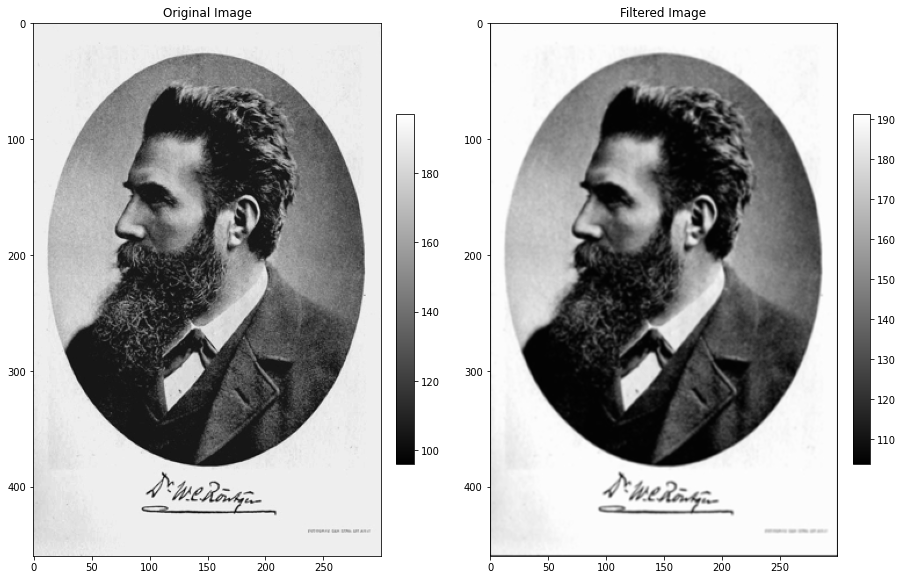

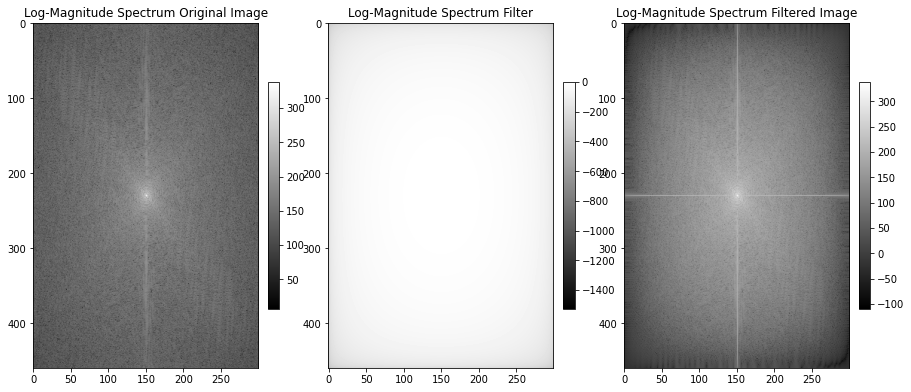

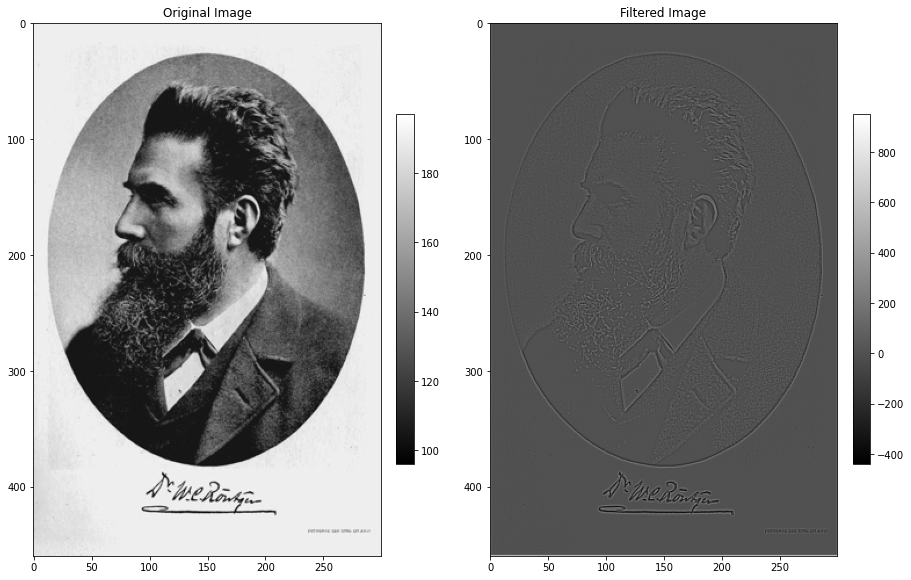

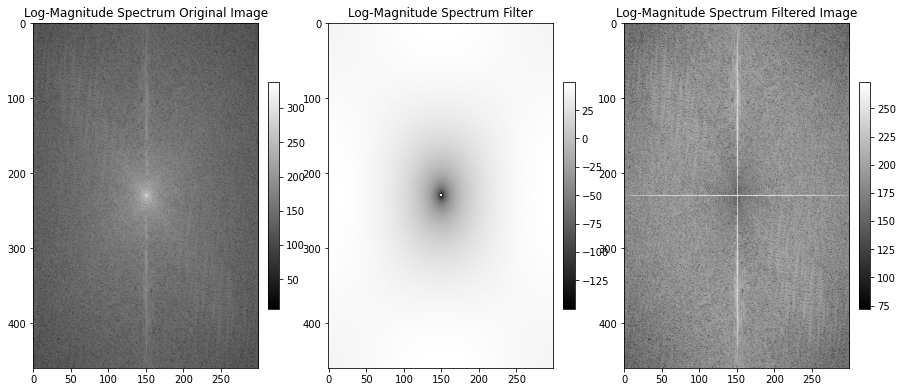

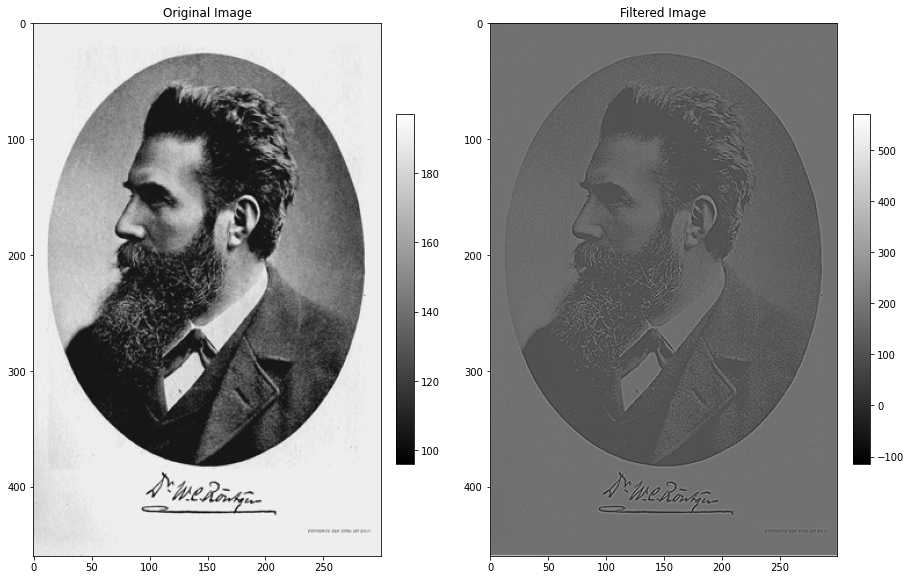

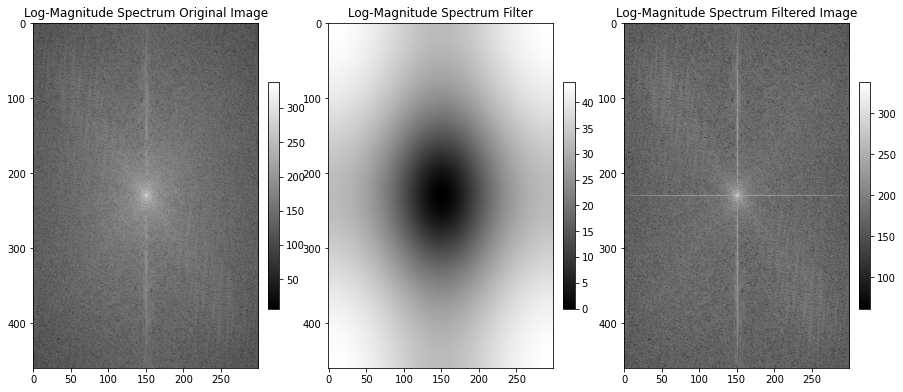

In [16]:
# Defining our filters 
H1 = (0.0625)*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
H2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
H3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
H = [H1, H2, H3]

# Looping over each filter and showing results
for i in range(len(H)):
  plot_filtering(img, H[i])


The frequency response (FFT) of a filter is a measure of how much each frequency component in the input signal is attenuated or amplified by the filter. <br>
Here we can conclude following results based our plots: <br>
1) Filter H1 is a low-pass filter since it smooths the image by reducing sharp transitions or edges, generally blurring or averaging neighborhood around each pixel(this smoothing is apparent if we pay attention to the writing below the man in the image). Generally, low frequencies are associated with the large-scale features such as overall brightness and contrast which change slowly across the image. H1 is also an averaging filter. <br>
2) Filter H2 is a high-pass filter since represents the edges. This kernel enhance edges by subtracting the average pixel value in a neighborhood around each pixel from the center pixel value. <br>
3) Filter H3 is also a high-pass filter but a modified one. It highlights edges and sharpen image in a more vivid way by subtracting blurred image from the original image. <br>